Here we analyse the manual assignment of venues to subjects.

In [52]:
import json
from matplotlib import pyplot as plt
from collections import Counter

In [53]:
candidates = {
  'venues': json.load(open('../data/json/dim/all/venue_candidates.json')),
  'advisors': json.load(open('../data/json/dim/all/advisor_candidates.json')),
  'referees': json.load(open('../data/json/dim/all/venue_candidates.json'))
}
assigned = json.load(open('../data/openalex/field_venue_cnt.json'))

Gather the documents of the venues without duplicate venues or documents

In [54]:
assigned_venues = []
for field in assigned:
  assigned_venues += list(assigned[field].keys())
len(assigned_venues)  # number of venues in the mapping

137

In [55]:
len(assigned_venues), len(set(assigned_venues))  # are there duplicates?

(137, 132)

In [56]:
venues = json.load(open('../data/json/dim/all/ert/venue_publications.json'))
advisors = json.load(open('../data/json/dim/all/ert/advisors.json'))
referees = json.load(open('../data/json/dim/all/ert/referees.json'))
all_venues = {}
for collection in (venues, advisors, referees):
  for venue in collection:
    if venue in assigned_venues:
      if venue in all_venues:
        all_venues[venue] = all_venues[venue].union(set(collection[venue]))
      else:
        all_venues[venue] = set(collection[venue])
len(all_venues)  # number of distinct venues in the mapping

132

In [65]:
venue_cnt = Counter([len(v) for v in all_venues.values()])
venue_cnt.most_common(5)

[(1, 31), (2, 16), (3, 10), (6, 6), (49, 4)]

How many venues are there with at least 10 documents?

In [57]:
cnt = 0
for venue in candidates:
  print(venue, len(candidates[venue]))
  cnt += len(candidates[venue])
print('total', cnt)

venues 70
advisors 13
referees 70
total 153


Analysis of venues included in the dataset.

In [58]:
field_docs = {}
for field in assigned:
  field_docs[field] = 0
  for venue in assigned[field]:
    field_docs[field] += len(all_venues[venue])
sum(field_docs.values())  # number of assignments

3711

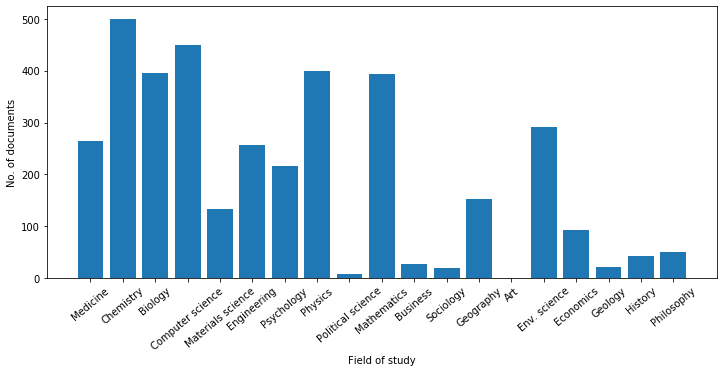

dict_values([264, 499, 395, 449, 134, 257, 217, 399, 8, 394, 27, 19, 152, 0, 291, 93, 21, 42, 50])

In [59]:
x = list(field_docs.keys())
x[x.index('Environmental science')] = 'Env. science'
plt.figure(figsize=(12,5))
plt.bar(range(len(field_docs)), field_docs.values())
plt.xticks(range(len(field_docs)), x, rotation=40)
plt.xlabel('Field of study')
plt.ylabel('No. of documents')
plt.show()
field_docs.values()

In [71]:
total = sum(field_docs.values())
for key, cnt in field_docs.items():
  print(key, cnt/total)

Medicine 0.07113985448666128
Chemistry 0.13446510374562112
Biology 0.1064403125842091
Computer science 0.12099164645648074
Materials science 0.036108865534896256
Engineering 0.06925357046618162
Psychology 0.05847480463486931
Physics 0.10751818916734034
Political science 0.002155753166262463
Mathematics 0.1061708434384263
Business 0.007275666936135812
Sociology 0.005119913769873349
Geography 0.040959310158986795
Art 0.0
Environmental science 0.07841552142279709
Economics 0.025060630557801132
Geology 0.005658852061438965
History 0.01131770412287793
Philosophy 0.013473457289140393


In [60]:
docs_per_venue = Counter([len(v) for v in all_venues.values()])
print(docs_per_venue.most_common(5))  # most common no. of documents per venue

[(1, 31), (2, 16), (3, 10), (6, 6), (49, 4)]


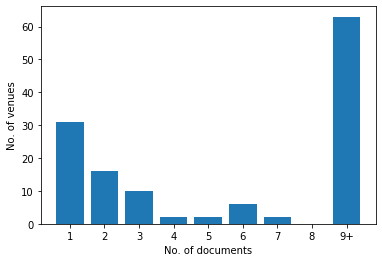

[31, 16, 10, 2, 2, 6, 2, 0, 63]

In [61]:
x = [str(i) for i in range(1, 10)]
x[-1] += '+'
y = [docs_per_venue[i] for i in range(1, 9)] 
y += [sum(docs_per_venue[i] for i in docs_per_venue if i >= 9)]
plt.bar(range(1, 10), y)
plt.xlabel('No. of documents')
plt.ylabel('No. of venues')
plt.xticks(range(1, 10), x)
plt.show()
y

In [62]:
63/sum(y), 31/sum(y)

(0.4772727272727273, 0.23484848484848486)

In [63]:
docs = {}
for venue in all_venues:
  for doc in all_venues[venue]:
    if doc in docs:
      docs[doc].append(venue)
    else:
      docs[doc] = [venue]
len(docs)  # number of distinct docs in the mapping

3377

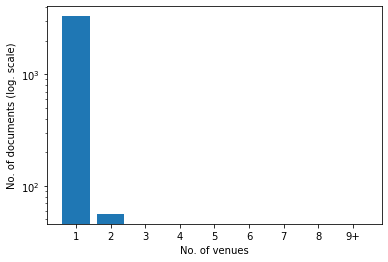

[3321, 56, 0, 0, 0, 0, 0, 0, 0]

In [64]:
venues_per_doc = Counter([len(v) for v in docs.values()])
x = [str(i) for i in range(1, 10)]
x[-1] += '+'
y = [venues_per_doc[i] for i in range(1, 9)] 
y += [sum(venues_per_doc[i] for i in venues_per_doc if i >= 9)]
plt.bar(range(1, 10), y)
plt.xlabel('No. of venues')
plt.ylabel('No. of documents (log. scale)')
plt.yscale('log')
plt.xticks(range(1, 10), x)
plt.show()
y

What is the distribution of documents across repositories?

In [67]:
repo_cnt = {'depositonce': 0, 'edoc': 0, 'refubium': 0}
for doc in docs:
  for repo in repo_cnt:
    if repo in doc:
      repo_cnt[repo] += 1
      break
repo_cnt

{'depositonce': 1190, 'edoc': 1052, 'refubium': 1135}

In [68]:
repo_totals = {'depositonce': 7438, 'edoc': 7497, 'refubium': 14464}  # total no. of docs
for repo in repo_totals:
  print(repo, repo_cnt[repo]/repo_totals[repo])

depositonce 0.15998924442054316
edoc 0.14032279578498066
refubium 0.07847068584070796


In [70]:
sum(repo_cnt.values()), sum(repo_cnt.values()) / sum(repo_totals.values())

(3377, 0.11486785264804926)